In [2]:
import pandas as pd
import seaborn as sn
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv("census.csv")
df

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
1,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
2,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
3,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
4,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32555,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32556,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32557,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32558,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


there are 32560 rows and 15 columns

classifier problem

the target variable is income column.

there are multiple columns with object datatype we have to encode those.

have to replace special characters.



# EDA

In [4]:
df.isnull().sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

there are no null values present but it doest say anything about this character ' ?' we have to specifically see about this.

In [5]:
df.dtypes

Age                int64
Workclass         object
Fnlwgt             int64
Education         object
Education_num      int64
Marital_status    object
Occupation        object
Relationship      object
Race              object
Sex               object
Capital_gain       int64
Capital_loss       int64
Hours_per_week     int64
Native_country    object
Income            object
dtype: object

our target variable is object datatype, and rest 6 columns are int datatype and 8 columns are object datatype.

In [124]:
df.isin([' ?']).sum()

Age                  0
Workclass         1836
Fnlwgt               0
Education            0
Education_num        0
Marital_status       0
Occupation        1843
Relationship         0
Race                 0
Sex                  0
Capital_gain         0
Capital_loss         0
Hours_per_week       0
Native_country     583
Income               0
dtype: int64

in workclass, occupation and native country column this special character ' ?' is present.

In [125]:
df['Workclass'].unique()

array([' Self-emp-not-inc', ' Private', ' State-gov', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

these are the unique values present is workclass column.

In [126]:
df['Workclass'].mode()

0     Private
dtype: object

the mode of this column is 'Private', we will replace the special character with private.

In [127]:
df['Workclass']=df['Workclass'].replace(' ?',' Private')

In [128]:
df['Occupation'].mode()

0     Prof-specialty
dtype: object

the mode of occupation is prof-speciality we will replace the special character with this data.

In [129]:
df['Occupation']=df['Occupation'].replace(' ?',' Prof-specialty')

In [130]:
df['Native_country'].mode()

0     United-States
dtype: object

mode of native country is united states we will replace the special chracter with this data.

In [131]:
df['Native_country']=df['Native_country'].replace(' ?',' United-States')

In [132]:
df.isin([' ?']).sum()

Age               0
Workclass         0
Fnlwgt            0
Education         0
Education_num     0
Marital_status    0
Occupation        0
Relationship      0
Race              0
Sex               0
Capital_gain      0
Capital_loss      0
Hours_per_week    0
Native_country    0
Income            0
dtype: int64

now there are no special characters present.

In [133]:
df.describe(include=['O'])

,Workclass,Education,Marital_status,Occupation,Relationship,Race,Sex,Native_country,Income
count,32560,32560,32560,32560,32560,32560,32560,32560,32560
unique,8,16,7,14,6,5,2,41,2
top,Private,HS-grad,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
freq,24532,10501,14976,5983,13193,27815,21789,29752,24719


our target variable has 2 unique data hence it is a classifier problem.
it gives the mode, frequency of the data and unique values in that column.

In [134]:
a=df.describe(include=['O']).columns

saving the object datatype columns in a variable

In [135]:
for i in a:
    print(i)
    print(df[i].value_counts())
    print('\n')

Workclass
 Private             24532
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1297
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: Workclass, dtype: int64


Education
 HS-grad         10501
 Some-college     7291
 Bachelors        5354
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: Education, dtype: int64


Marital_status
 Married-civ-spouse       14976
 Never-married            10682
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: Marital_status, dtype: int64


Occupation
 Prof-specialty       5983
 Craft-repair     

printed all the individual values of the object datatype columns.

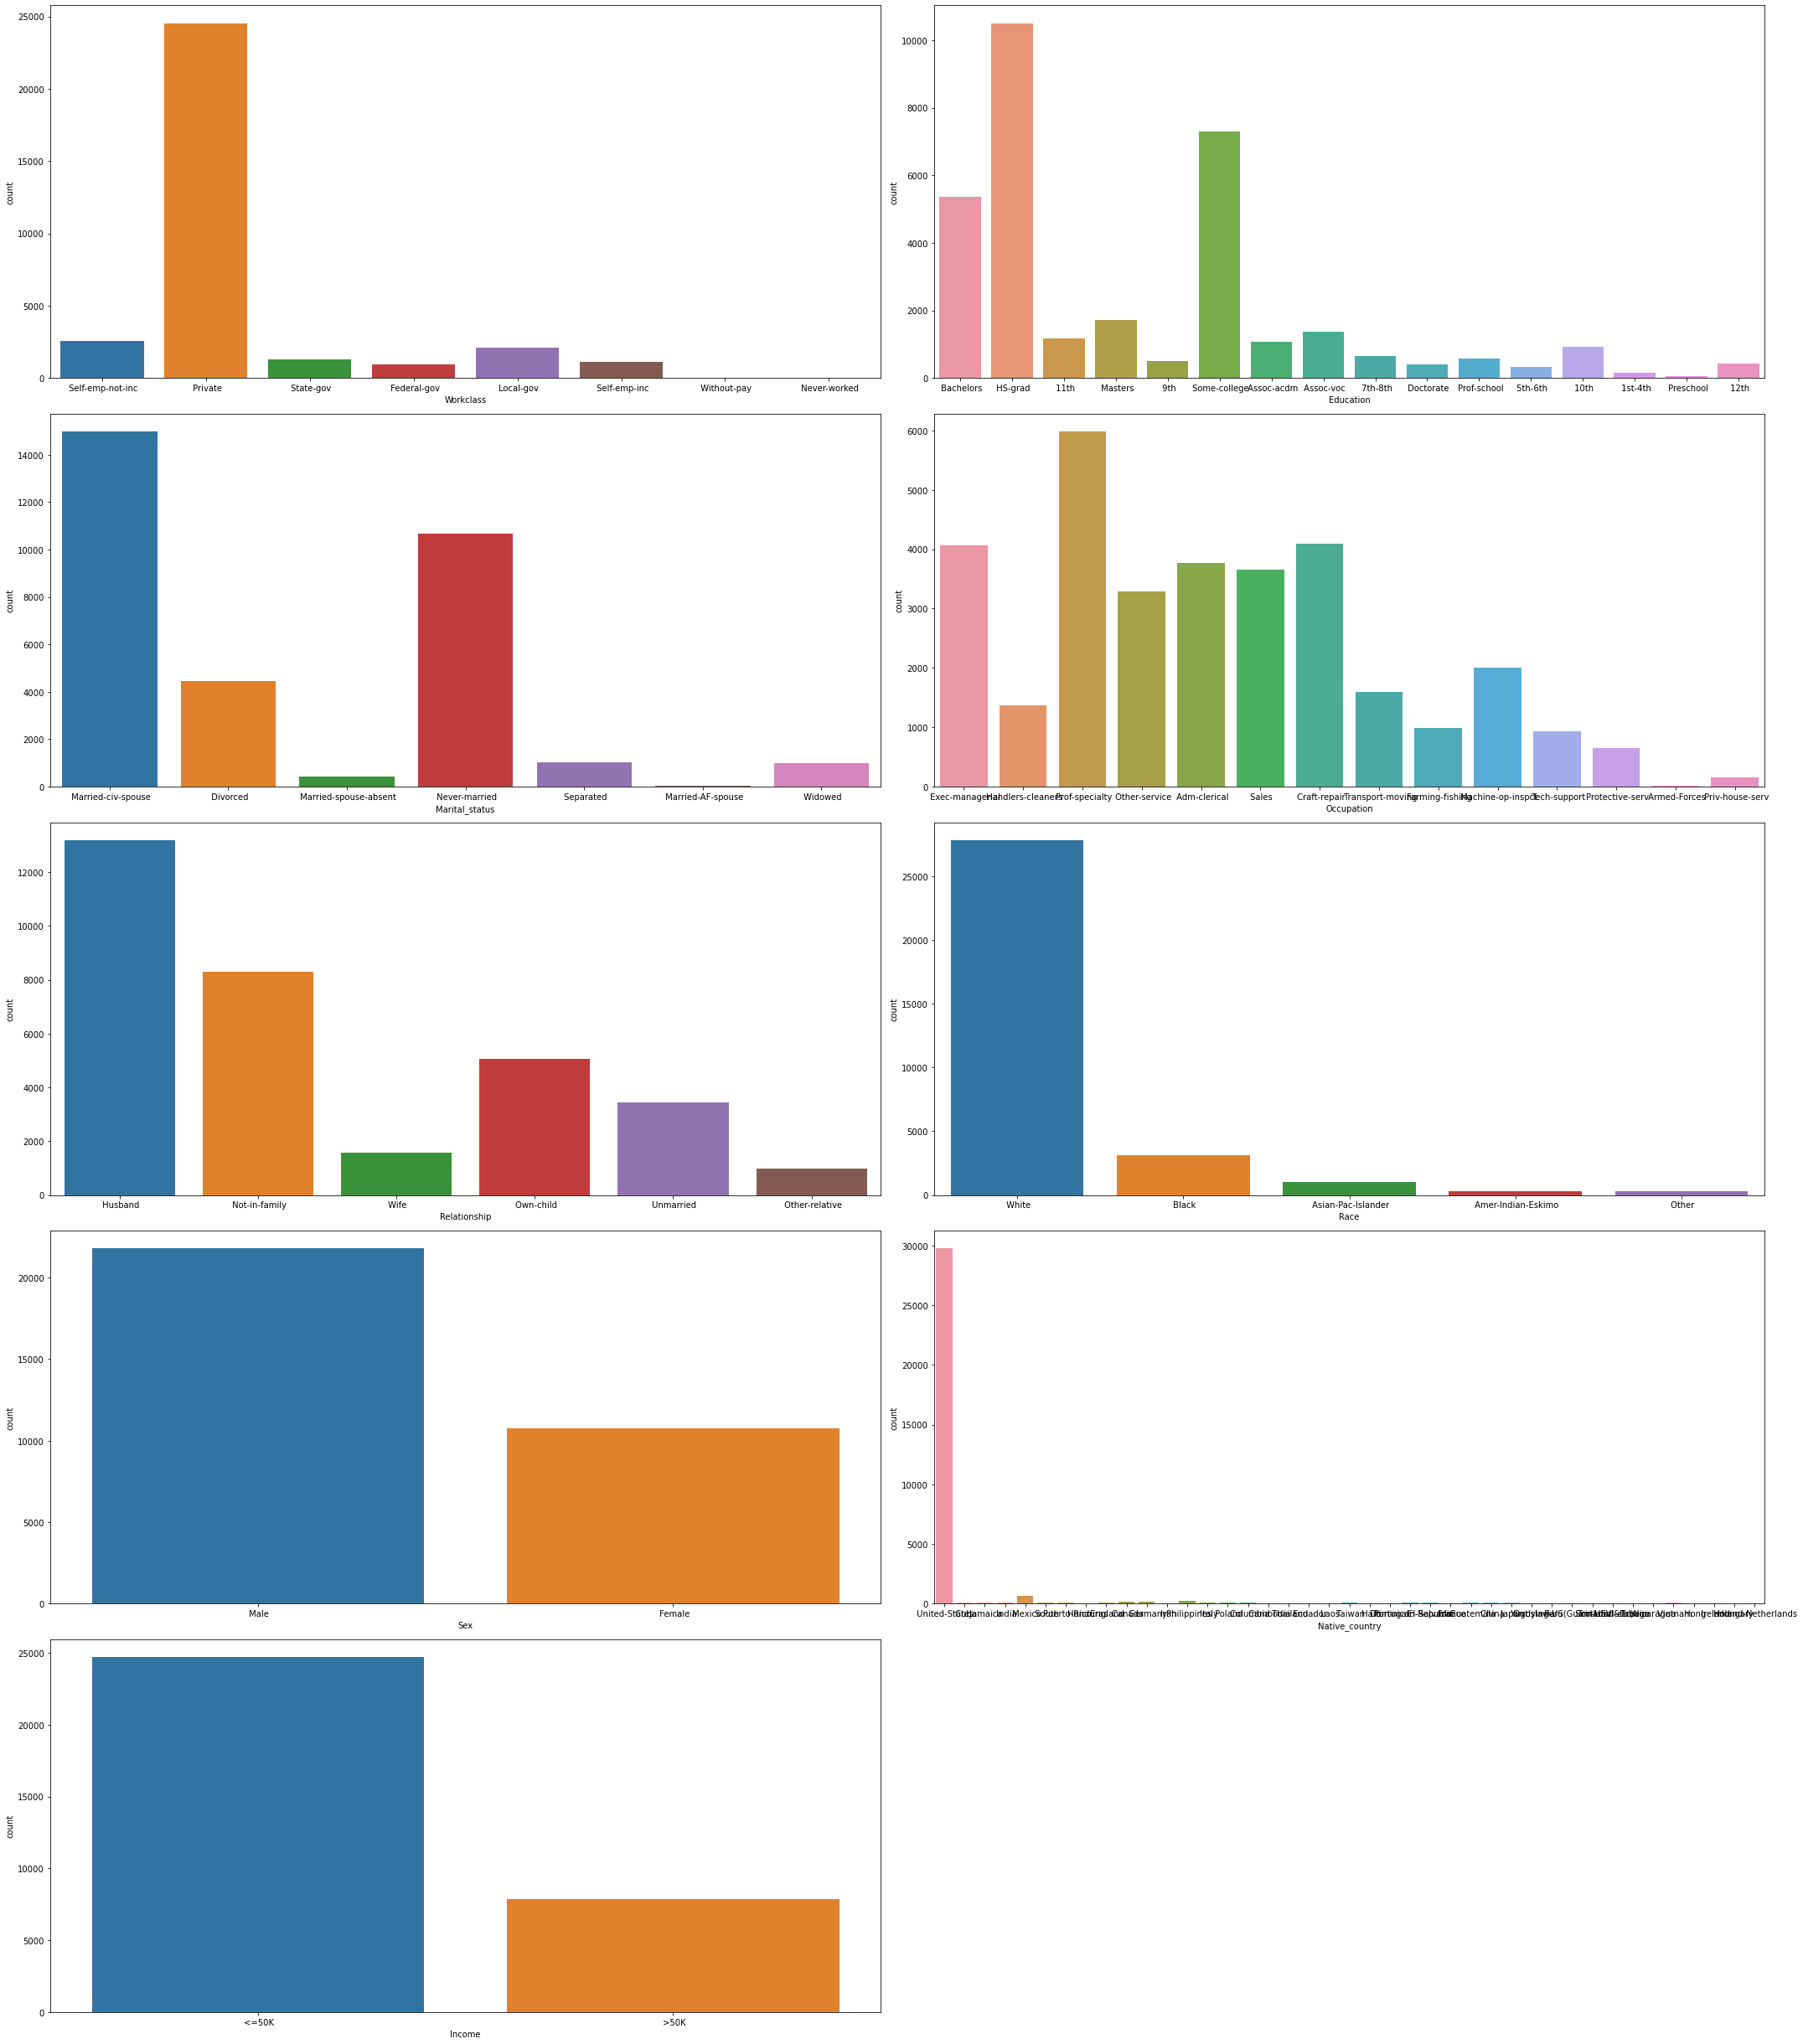

In [136]:
plt.figure(figsize=(30,34))
for i in range(len(a)):
    plt.subplot(5,2,i+1)
    sn.countplot(df[a[i]])
    plt.tight_layout()

maximum people are from private workclass.

education of maximum people are HS grad.

occupation of max people are prof-speciality.

race of max people are white.

and almost all of the are from united states.

as income is our target variable there is a difference in the variable, we need to balance it.

maximum male gender is present.

and the relationship shows maximum count is of husband.





<AxesSubplot:xlabel='Age', ylabel='count'>

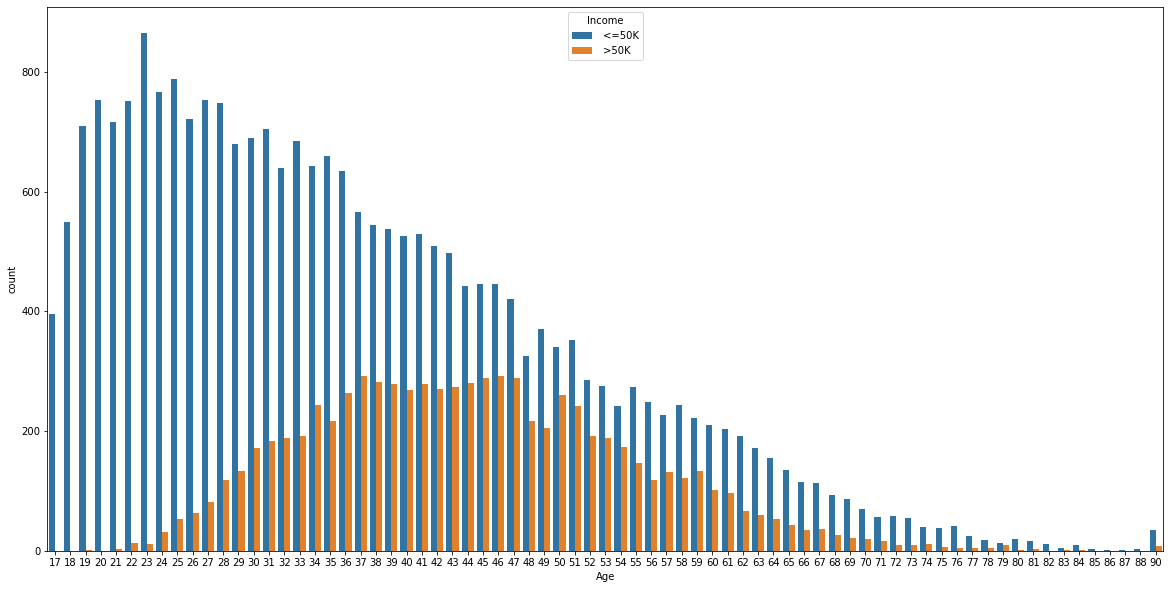

In [137]:
plt.figure(figsize=(20,10))
sn.countplot(df['Age'],hue=df['Income'])

at the age of 34-47 people earn more than 50k.

at the young age generally people earn less than 50k.

<AxesSubplot:xlabel='Hours_per_week', ylabel='count'>

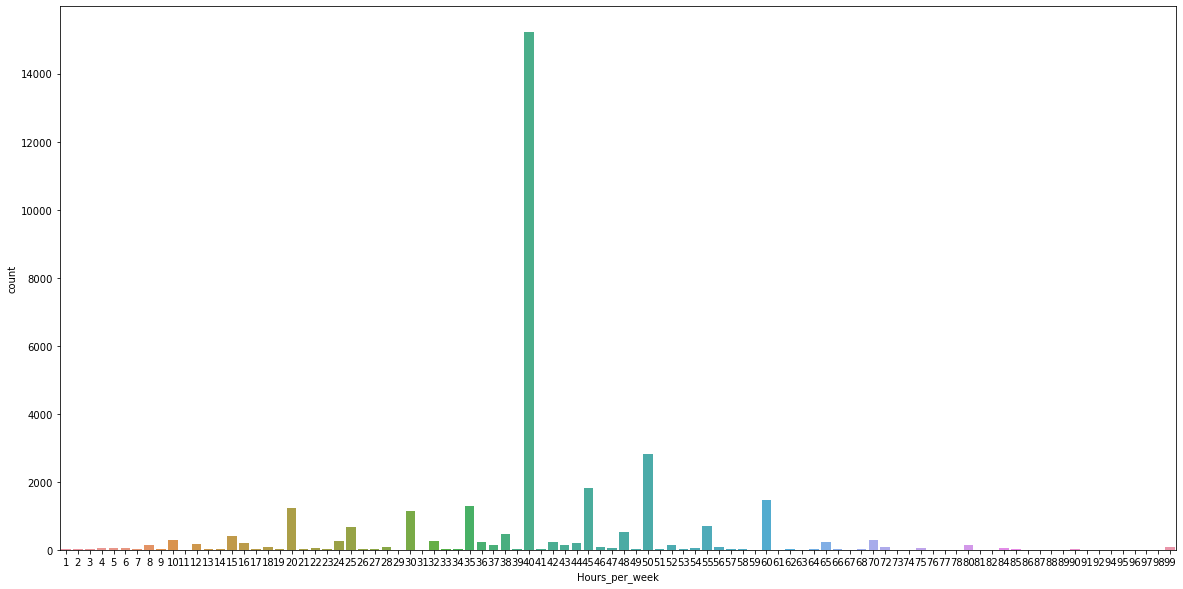

In [138]:
plt.figure(figsize=(20,10))
sn.countplot(df['Hours_per_week'])

maximum people work 40 hours a week.

In [139]:
df.describe()

,Age,Fnlwgt,Education_num,Capital_gain,Capital_loss,Hours_per_week
count,32560.000000,3.256000e+04,32560.000000,32560.000000,32560.000000,32560.000000
mean,38.581634,1.897818e+05,10.080590,1077.615172,87.306511,40.437469
std,13.640642,1.055498e+05,2.572709,7385.402999,402.966116,12.347618
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178315e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783630e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370545e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


in capital gain and capital loss there is a huge difference between min and max value and also there is a huge difference between 75% and max value, we need to check these columns outleirs must be present.



In [140]:
df['Capital_gain'].nunique()

119

119 unique values are present in capital gain column

In [141]:
df['Capital_loss'].nunique()

92

92 unique values are present in capital loss column.

Age                  AxesSubplot(0.125,0.657941;0.0824468x0.222059)
Fnlwgt            AxesSubplot(0.223936,0.657941;0.0824468x0.222059)
Education_num     AxesSubplot(0.322872,0.657941;0.0824468x0.222059)
Capital_gain      AxesSubplot(0.421809,0.657941;0.0824468x0.222059)
Capital_loss      AxesSubplot(0.520745,0.657941;0.0824468x0.222059)
Hours_per_week    AxesSubplot(0.619681,0.657941;0.0824468x0.222059)
dtype: object

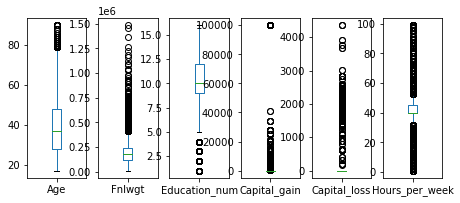

In [142]:
df.plot(kind='box',subplots=True,layout=(3,8),figsize=(10,10))

huge number of outliers are present.

<AxesSubplot:xlabel='Age', ylabel='Density'>

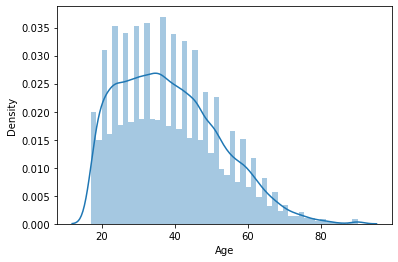

In [143]:
sn.distplot(df['Age'])

skeweness present

<AxesSubplot:xlabel='Fnlwgt', ylabel='Density'>

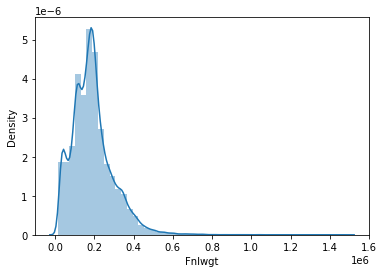

In [144]:
sn.distplot(df['Fnlwgt'])

skeweness present

<AxesSubplot:xlabel='Education_num', ylabel='Density'>

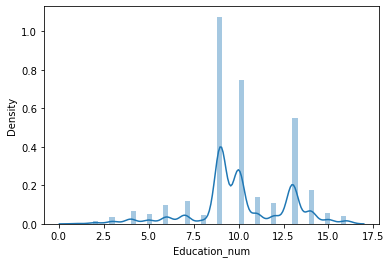

In [145]:
sn.distplot(df['Education_num'])

skeweness present

<AxesSubplot:xlabel='Capital_gain', ylabel='Density'>

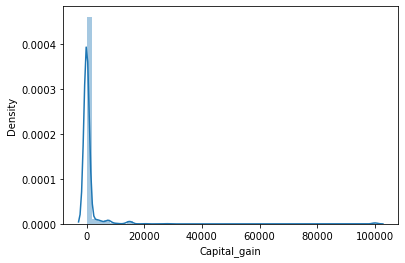

In [146]:
sn.distplot(df['Capital_gain'])

skeweness present

<AxesSubplot:xlabel='Capital_loss', ylabel='Density'>

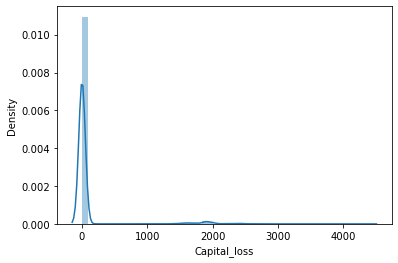

In [147]:
sn.distplot(df['Capital_loss'])

skewness present

In [148]:
object_list=list(df.select_dtypes(['object']).columns)
from sklearn.preprocessing import LabelEncoder
for i in object_list:
    le=LabelEncoder()
    df[i]=le.fit_transform(df[i])

encoding the object datatype columns.

In [149]:
df.head()

,Age,Workclass,Fnlwgt,Education,Education_num,Marital_status,Occupation,Relationship,Race,Sex,Capital_gain,Capital_loss,Hours_per_week,Native_country,Income
0,50,5,83311,9,13,2,3,0,4,1,0,0,13,38,0
1,38,3,215646,11,9,0,5,1,4,1,0,0,40,38,0
2,53,3,234721,1,7,2,5,0,2,1,0,0,40,38,0
3,28,3,338409,9,13,2,9,5,2,0,0,0,40,4,0
4,37,3,284582,12,14,2,3,5,4,0,0,0,40,38,0


<AxesSubplot:>

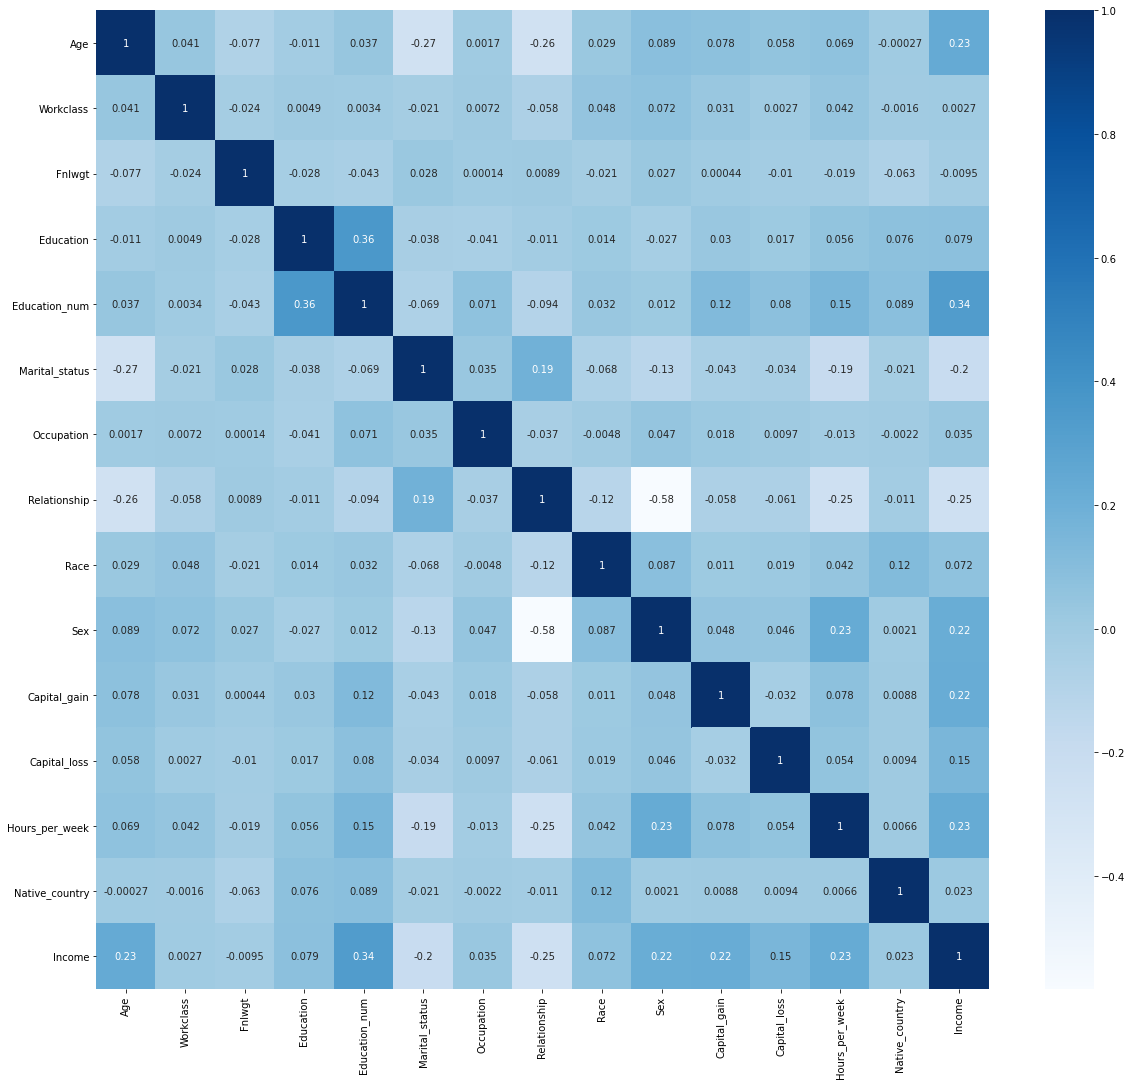

In [150]:
df_correlation=df.corr()
plt.figure(figsize=(20,18))
sn.heatmap(df_correlation,cmap='Blues',annot=True)

education_num has the highest correlation with the income column and the least correlation is with relationship.

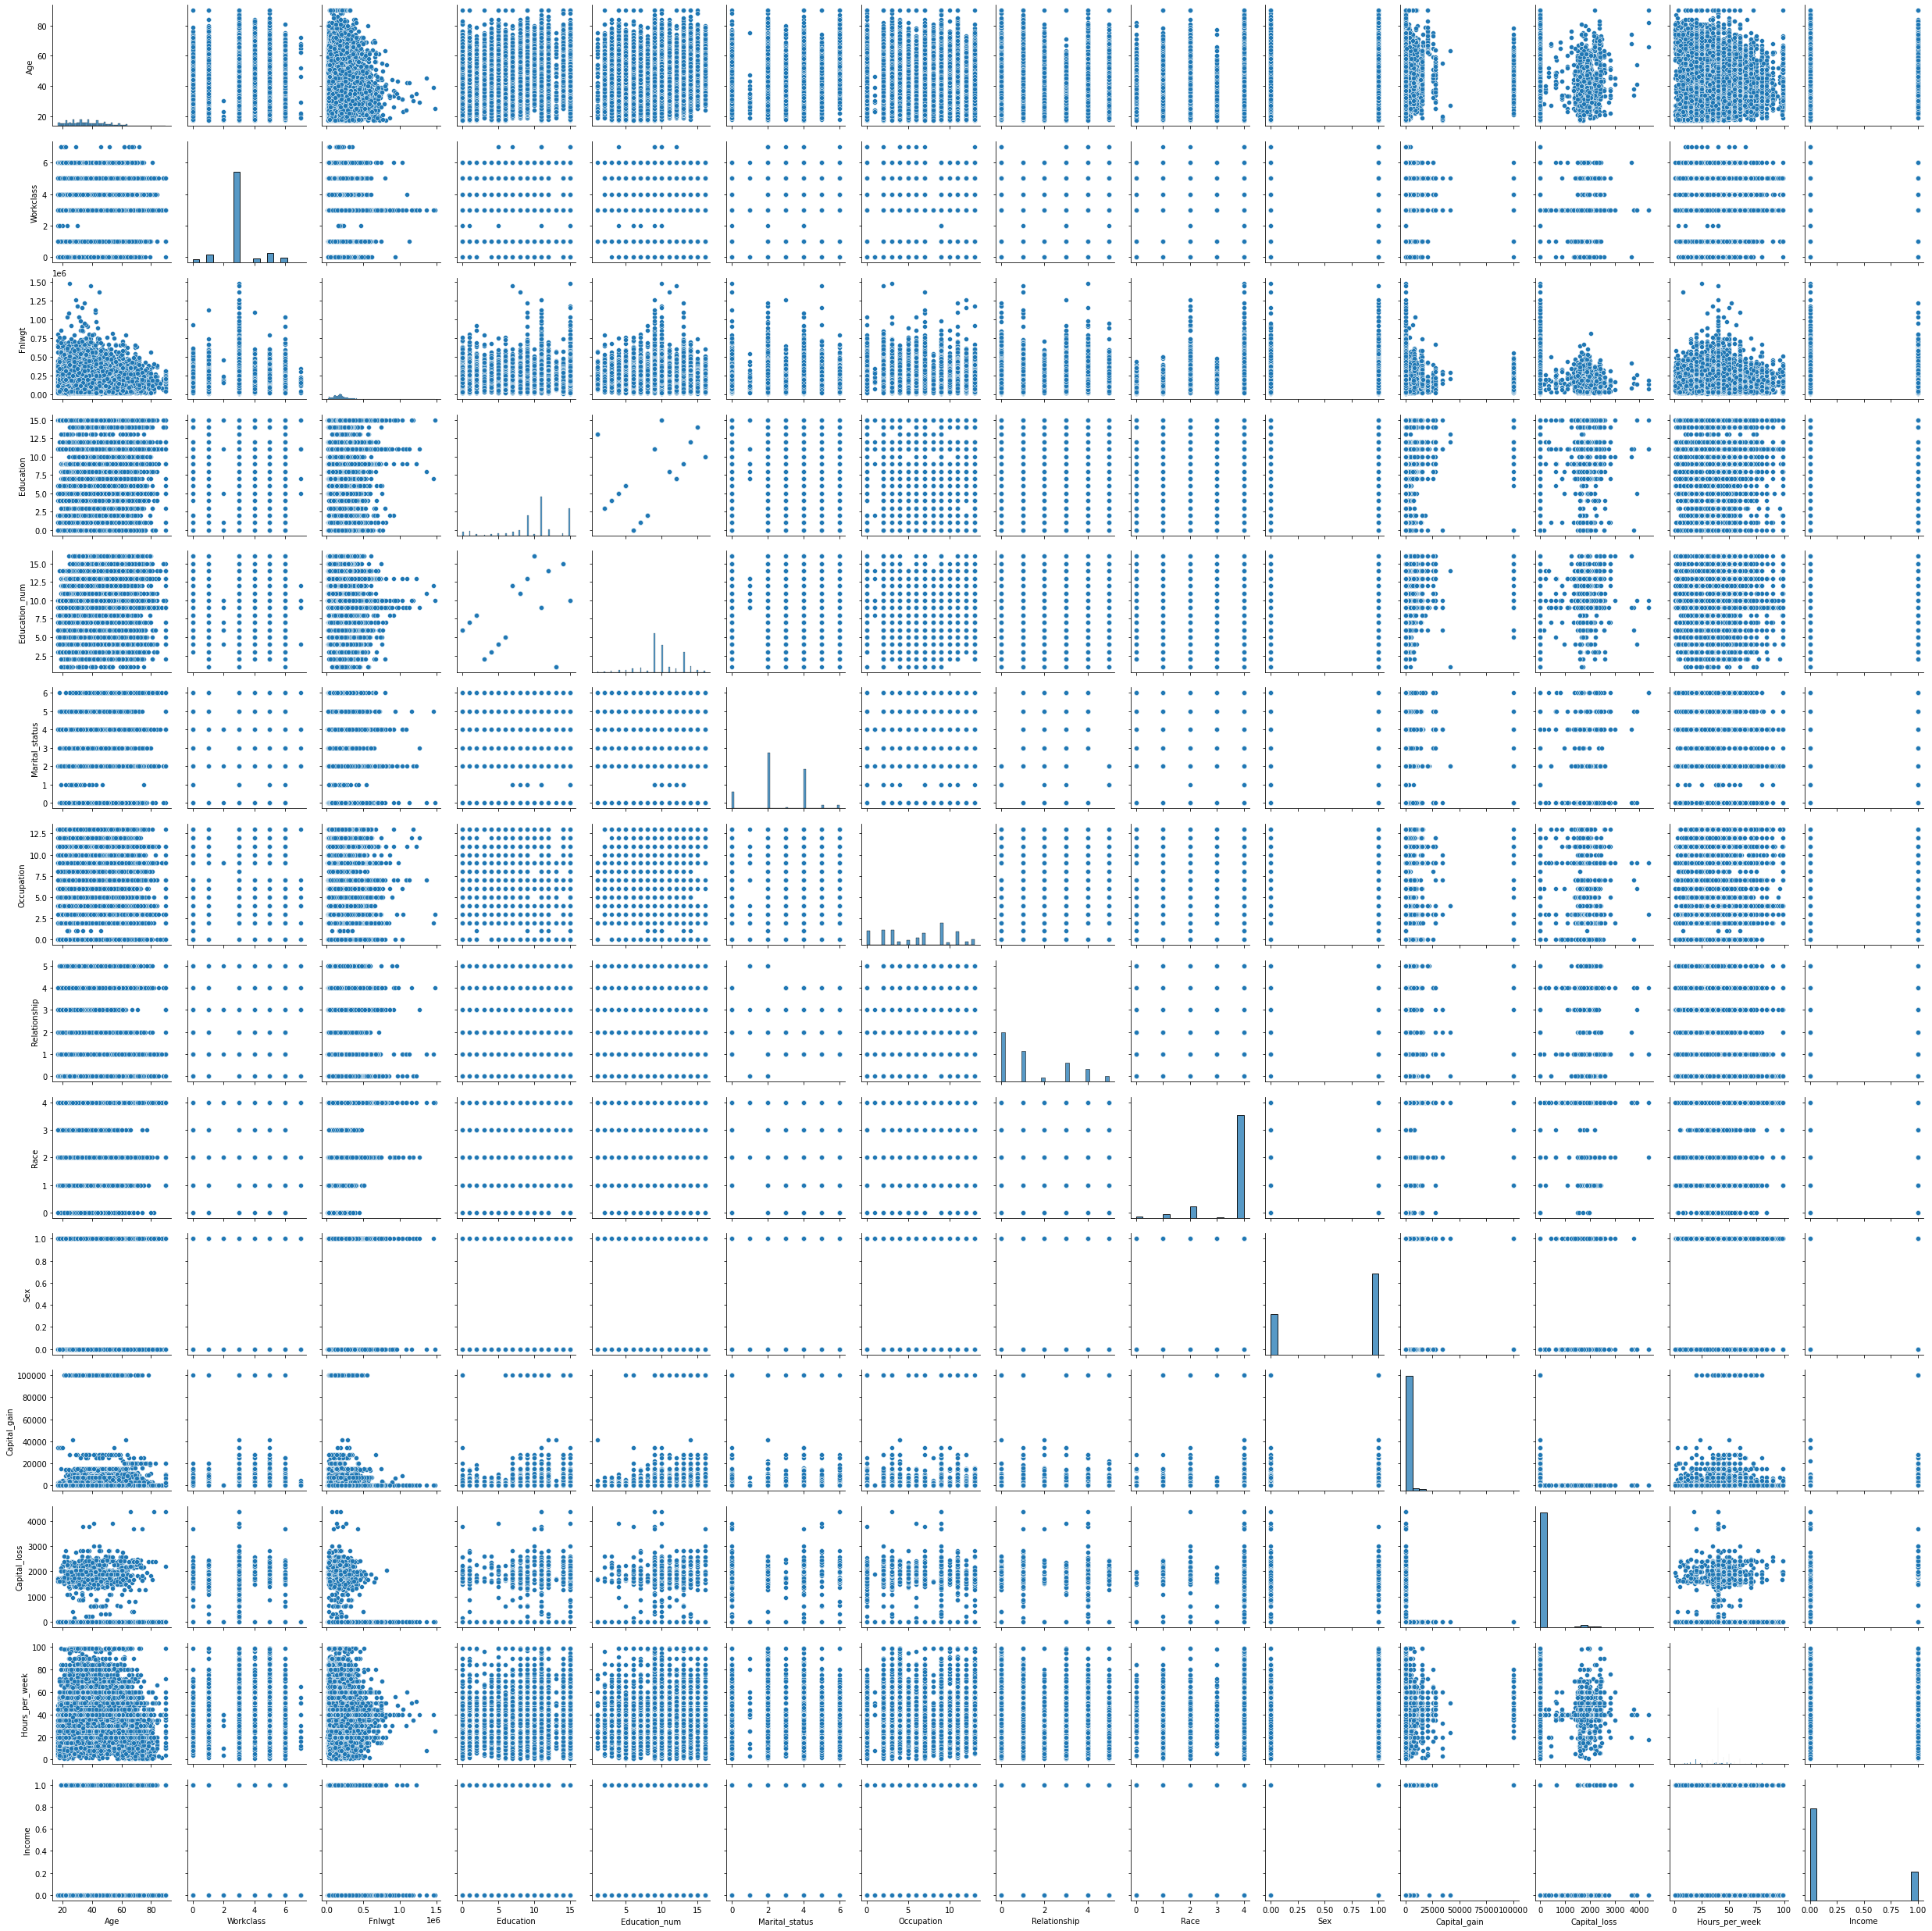

In [219]:
sn.pairplot(df)

younger age has low income than 50k

with higher education, income is more than 50k



In [152]:
import statsmodels.api as sm
from scipy import stats
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(df):
    vif=pd.DataFrame()
    vif["variables"]=df.columns
    vif["VIF FACTOR"]=[variance_inflation_factor(df.values,i) for i in range(df.shape[1])]
    return(vif)

calc_vif(df)

,variables,VIF FACTOR
0,Age,8.975322
1,Workclass,8.473204
2,Fnlwgt,4.043222
3,Education,9.258355
4,Education_num,20.127613
5,Marital_status,4.160015
6,Occupation,3.386616
7,Relationship,2.703775
8,Race,17.897167
9,Sex,4.526252


Native_country has high multicollinearity hence we will drop the column.

In [153]:
df.drop('Native_country',axis=1,inplace=True)

In [154]:
from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
np.where(z>3)

(array([    9,    10,    13, ..., 32532, 32550, 32552], dtype=int64),
 array([12,  8,  8, ...,  8,  8,  8], dtype=int64))

In [155]:
df_new=df[(z<3).all(axis=1)]
df_new.head()
df_new.shape

(28577, 14)

In [156]:
df.shape

(32560, 14)

In [157]:
Data_loss=((32560-28577)/32560)*100
Data_loss

12.232800982800983

after removing the outliers the data loss is huge hence we cant remove the outliers.

In [158]:
Q1=df.quantile(0.25)
Q3=df.quantile(0.75)
IQR=Q3-Q1
df_new=df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]

In [159]:
df_new.shape

(8938, 14)

in this IQR method also data loss is huge hence we will not remove the outleirs.

In [160]:
x=df.drop('Income',axis=1)
y=df['Income']

splitting the x and y column

In [167]:
x.skew()

Age               0.558738
Workclass         0.076178
Fnlwgt            1.446972
Education        -0.934063
Education_num    -0.311630
Marital_status   -0.013448
Occupation        0.000536
Relationship      0.786784
Race             -2.435332
Sex              -0.719244
Capital_gain      3.019100
Capital_loss      4.594549
Hours_per_week    0.227636
dtype: float64

In [162]:
x['Capital_gain']=np.log1p(x['Capital_gain'])

In [166]:
x['Capital_gain']=np.cbrt(x['Capital_gain'])

In [171]:
x['Capital_loss'].nunique()

92

In [172]:
x['Capital_gain'].nunique()

119

In [174]:
integers=list(df.select_dtypes(['int64']).columns)
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer()
for i in integers:
    if abs(x.loc[:,i].skew())>0.55:
        x.loc[:,i]=pt.fit_transform(x.loc[:,i].values.reshape(-1,1))


skweness present in the int datatype column has been removed

# scaling

In [176]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x=scaler.fit_transform(x)
x=pd.DataFrame(x)
x.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.891947,1.721336,-1.089889,-0.335443,1.134779,-0.406183,-0.790156,-0.900177,0.393675,0.703087,-0.30137,-0.221213,-2.22212
1,0.102717,-0.085223,0.398743,0.181319,-0.420027,-1.734026,-0.286703,-0.277810,0.393675,0.703087,-0.30137,-0.221213,-0.03543
2,1.064381,-0.085223,0.562540,-2.402489,-1.197429,-0.406183,-0.286703,-0.900177,-1.962583,0.703087,-0.30137,-0.221213,-0.03543
3,-0.731663,-0.085223,1.340398,-0.335443,1.134779,-0.406183,0.720204,2.211658,-1.962583,-1.422298,-0.30137,-0.221213,-0.03543
4,0.028023,-0.085223,0.957182,0.439700,1.523480,-0.406183,-0.790156,2.211658,0.393675,-1.422298,-0.30137,-0.221213,-0.03543


scaled the data

# Sampling

In [177]:
from imblearn.over_sampling import SMOTE
smt=SMOTE()
trainx,trainy=smt.fit_resample(x,y)
trainx.value_counts()
trainy.value_counts()

0    24719
1    24719
Name: Income, dtype: int64

In [178]:
x=pd.DataFrame(trainx)
y=pd.DataFrame(trainy)

In [180]:
x.shape

(49438, 13)

In [181]:
y.shape

(49438, 1)

balanced the target variable as there was imbalance in the target variable now our rows are 49438

# Training and Testing of model

In [182]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [184]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=DecisionTreeClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8544897333741955 on random state 77


In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=77)

In [186]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of DecisionTreeClassifier() is:
0.8528348145878026
[[6901 1184]
 [1217 7013]]
              precision    recall  f1-score   support

           0       0.85      0.85      0.85      8085
           1       0.86      0.85      0.85      8230

    accuracy                           0.85     16315
   macro avg       0.85      0.85      0.85     16315
weighted avg       0.85      0.85      0.85     16315





In [187]:
from sklearn.model_selection import cross_val_score

c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of DecisionTreeClassifier() is:  0.8469814833999599


In [188]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=RandomForestClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8982531412810297 on random state 3


In [190]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=3)

In [191]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of RandomForestClassifier() is:
0.8979466748391051
[[7263  939]
 [ 726 7387]]
              precision    recall  f1-score   support

           0       0.91      0.89      0.90      8202
           1       0.89      0.91      0.90      8113

    accuracy                           0.90     16315
   macro avg       0.90      0.90      0.90     16315
weighted avg       0.90      0.90      0.90     16315





In [192]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of RandomForestClassifier() is:  0.8973676574417127


In [193]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=LogisticRegression()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.7778118296046583 on random state 102


In [194]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=102)

In [195]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of LogisticRegression() is:
0.7778118296046583
[[6336 1889]
 [1736 6354]]
              precision    recall  f1-score   support

           0       0.78      0.77      0.78      8225
           1       0.77      0.79      0.78      8090

    accuracy                           0.78     16315
   macro avg       0.78      0.78      0.78     16315
weighted avg       0.78      0.78      0.78     16315





In [196]:
from sklearn.model_selection import cross_val_score

c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of LogisticRegression() is:  0.7715523665805479


In [197]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    a=KNeighborsClassifier()
    a.fit(x_train,y_train)
    pred=a.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("best accuracy is",maxAccu,"on random state",maxRS)

best accuracy is 0.8518541219736439 on random state 63


In [198]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=63)

In [199]:
a.fit(x_train,y_train)
a.score(x_train,y_train)
predm=a.predict(x_test)
print('accuracy score of' ,a, 'is:')
print(accuracy_score(y_test,predm))
print(confusion_matrix(y_test,predm))
print(classification_report(y_test,predm))
print('\n')

accuracy score of KNeighborsClassifier() is:
0.8518541219736439
[[6275 1837]
 [ 580 7623]]
              precision    recall  f1-score   support

           0       0.92      0.77      0.84      8112
           1       0.81      0.93      0.86      8203

    accuracy                           0.85     16315
   macro avg       0.86      0.85      0.85     16315
weighted avg       0.86      0.85      0.85     16315





In [200]:
from sklearn.model_selection import cross_val_score
c=cross_val_score(a,x,y,cv=5).mean()
print("the cross val score of",a,"is: ",c)

the cross val score of KNeighborsClassifier() is:  0.8533318959746756


after seeing the model performance and the cross val score the least diffrence between the 2 factors in RandomForestClassifier hence it is our best model

# Hyperparameter tuning

In [201]:
from sklearn.model_selection import GridSearchCV
import numpy as np

In [202]:
parameter={
         'max_features':['auto','sqrt','log2'],
          'min_samples_split':np.arange(0,10),
          'max_depth':np.arange(0,10),
          'min_samples_leaf':np.arange(0,10)}

In [203]:
GCV=GridSearchCV(RandomForestClassifier(),parameter,cv=10)

In [204]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=RandomForestClassifier(),
             param_grid={'max_depth': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_leaf': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
                         'min_samples_split': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])})

In [205]:
GCV.best_params_

{'max_depth': 9,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [210]:
census_mod=RandomForestClassifier(max_features='sqrt',max_depth=9,min_samples_leaf=1,min_samples_split=5)
census_mod.fit(x_train,y_train)
pred=census_mod.predict(x_test)
acc=accuracy_score(y_test,pred)
print(acc*100)

85.27735212994178


after hyperparameter tuning our accuracy is 85,27%

# AUC_ROC

In [211]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score

In [213]:
y_pred_prob=census_mod.predict_proba(x_test)[:,1]

In [214]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)

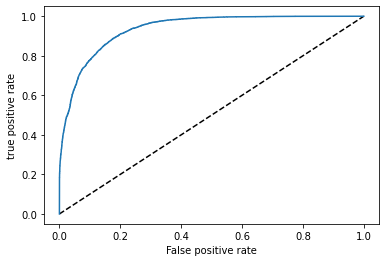

In [215]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('true positive rate')
plt.show()

In [217]:
auc_score=roc_auc_score(y_test,census_mod.predict(x_test))
print(auc_score)

0.852410644792243


our auc score and accuracy score is same, 85.24 which is same only.

# Saving Model

In [218]:
import joblib
joblib.dump(census_mod,"census.pkl")

['census.pkl']

saving the model with the filename census.pkl